In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import sys
sys.path.append('..')
from utils import read_graph

In [2]:
def print_info(G):
    print("Nodes: {}".format(nx.number_of_nodes(G)))
    print("Edges: {}".format(nx.number_of_edges(G)))
    print("Isolated nodes: {}".format(nx.number_of_isolates(G)))
    print("Self-edges: {}".format(nx.number_of_selfloops(G)))
    print("SCCs: {}".format(nx.number_strongly_connected_components(G)))
    print("WCCs: {}".format(nx.number_weakly_connected_components(G)))
    print("Average clustering coef: {}".format(nx.average_clustering(G.to_undirected())))
    

In [8]:
def plot_degree_dist(G):
    degree_counts = Counter([deg for node, deg in G.degree])
    plt.loglog(list(degree_counts.keys()), list(degree_counts.values()), 'bo')
    plt.title("Degree distribution plot")
    plt.ylabel("count")
    plt.xlabel("degree")
    plt.show()
    
    weighted_degree_counts = Counter([deg for node, deg in G.degree(weight="weight")])
    plt.plot(list(weighted_degree_counts.keys()), list(weighted_degree_counts.values()), 'bo')
    plt.xscale('symlog')
    plt.yscale('log')
    plt.title("Weighted degree distribution plot")
    plt.ylabel("count")
    plt.xlabel("weighted degree")
    plt.show()

In [9]:
def all_info(graph_name):
    print("#"*20 + " " + graph_name + " " + "#"*20)
    G = read_graph(graph_name)
    print_info(G)
    plot_degree_dist(G)

#################### OTCNet.csv ####################
Nodes: 5881
Edges: 35592
Isolated nodes: 0
Self-edges: 0
SCCs: 1144
WCCs: 4
Average clustering coef: 0.17750449405289517


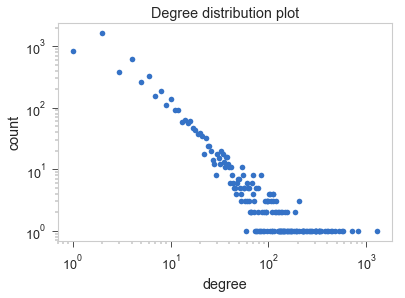

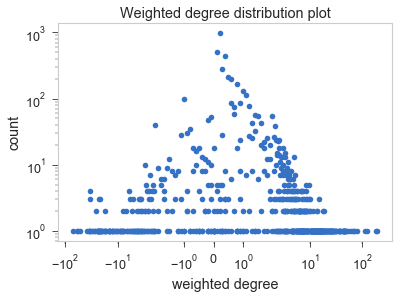

#################### BTCAlphaNet.csv ####################
Nodes: 3783
Edges: 24186
Isolated nodes: 0
Self-edges: 0
SCCs: 540
WCCs: 5
Average clustering coef: 0.1766290303590767


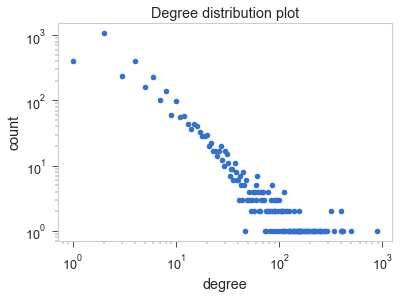

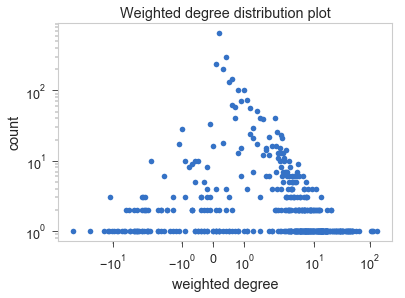

In [10]:
for graph_name in ["OTCNet.csv", "BTCAlphaNet.csv"]:#, "EpinionNet.csv", "RFAnet.csv", "WikiSignedNet.csv"]:
    all_info(graph_name)

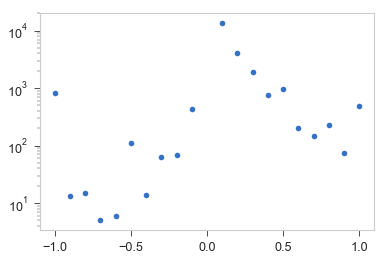

In [11]:
GOTC = read_graph("BTCAlphaNet.csv")
weights = Counter([GOTC.get_edge_data(u,v)['weight'] for u,v in GOTC.edges])
plt.plot(list(weights.keys()), list(weights.values()), 'bo')
plt.yscale('log')

In [12]:
[len(c) for c in sorted(nx.weakly_connected_components(read_graph("OTCNet.csv")), key=len, reverse=True)]

[5875, 2, 2, 2]

In [13]:
[len(c) for c in sorted(nx.weakly_connected_components(read_graph("BTCAlphaNet.csv")), key=len, reverse=True)]

[3775, 2, 2, 2, 2]